**Time Series Forecasting**

Time series forecasting involves predicting future values based on previously observed values. It's a crucial aspect of data analysis in numerous fields, enabling organizations and individuals to make informed decisions by projecting past trends into the future. The core importance of time series forecasting lies in its ability to identify patterns, trends, and cycles in historical data, and use these insights to predict future events. This predictive capability is invaluable for planning, budgeting, and managing resources effectively, ensuring that strategies are both proactive and responsive to anticipated changes.




**Why Keras is Suitable for Time Series Forecasting?**

Keras is a powerful, user-friendly neural network library written in Python, designed to enable fast experimentation with deep learning. It acts as an interface for the TensorFlow library, combining ease of use with flexibility, and is capable of running on top of TensorFlow.



1.   It offers a high-level, intuitive API, making it accessible for beginners while still being robust enough for research and development.
2.    It supports a wide range of network architectures, including fully connected, convolutional, and recurrent neural networks (RNNs), essential for handling various time series forecasting tasks.
3.    It is optimized for performance, allowing for rapid experimentation and iteration, which is crucial in the development and tuning of predictive models.







**Setting Up the Development Environment**

Following the introduction to time series forecasting and the advantages of using Keras for such tasks, we now embark on the practical journey of implementing a time series forecasting model. In this section, we will set up our development environment and prepare our dataset for modeling. The Python libraries and tools we'll use form the backbone of our data processing and model development. Here's a breakdown of the code snippet and its components:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations
from keras.callbacks import EarlyStopping, ModelCheckpoint



•	os: This module provides a portable way of using operating system-dependent functionality like reading or writing to a file system.

•	numpy: A fundamental package for scientific computing in Python. It's used for working with arrays and matrices, alongside a collection of mathematical functions to operate on these data structures.

•	pandas: An essential library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series.

•	matplotlib.pyplot: A plotting library for creating static, interactive, and animated visualizations in Python.

•	sklearn.preprocessing.StandardScaler: A preprocessing module used to standardize features by removing the mean and scaling to unit variance. This is particularly important in neural networks to ensure that all input features have similar scale.

•	tensorflow: An open-source library for numerical computation and machine learning. TensorFlow offers a comprehensive, flexible ecosystem of tools, libraries, and community resources that lets researchers push the state-of-the-art in ML, and developers easily build and deploy ML-powered applications.

•	keras: Integrated into TensorFlow, it simplifies many operations and is used to build and train neural networks. We specifically import submodules for defining layers and activations, along with callbacks like EarlyStopping and ModelCheckpoint for model training optimization.

•	EarlyStopping: Monitors the model's performance on a validation set and stops training when the performance stops improving, preventing overfitting.

•	ModelCheckpoint: Saves the model at specific intervals, allowing us to keep the model at its best performance.

**Preprocessing data**

In this section of our notebook, we delve into the critical step of preprocessing our dataset to ensure it's in the optimal format for our time series forecasting model. Our dataset, titled daily-website-visitors.csv, contains daily metrics of website traffic, such as page loads and unique visits. Let's explore the preprocessing steps:

In [3]:
df = pd.read_csv('daily-website-visitors.csv')

We start by loading our dataset using pandas, which allows us to work with the data in a tabular form, facilitating data manipulation and analysis. (Help with uploading: https://neptune.ai/blog/google-colab-dealing-with-files)

In [4]:
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


In [5]:
for col in ['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits']:
    df[col] = df[col].map(lambda x: float(x.replace(",", "")))

For columns representing numerical values (Page.Loads, Unique.Visits, First.Time.Visits, Returning.Visits), we remove commas and convert the strings to floats. This step is crucial as numeric operations require numerical data types. (Help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.map.html)

In [6]:
df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,2146.0,1582.0,1430.0,152.0
1,2,Monday,2,9/15/2014,3621.0,2528.0,2297.0,231.0
2,3,Tuesday,3,9/16/2014,3698.0,2630.0,2352.0,278.0
3,4,Wednesday,4,9/17/2014,3667.0,2614.0,2327.0,287.0
4,5,Thursday,5,9/18/2014,3316.0,2366.0,2130.0,236.0
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,2221.0,1696.0,1373.0,323.0
2163,2164,Sunday,1,8/16/2020,2724.0,2037.0,1686.0,351.0
2164,2165,Monday,2,8/17/2020,3456.0,2638.0,2181.0,457.0
2165,2166,Tuesday,3,8/18/2020,3581.0,2683.0,2184.0,499.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

Converting the Date column to datetime objects allows for easier manipulation of dates and enables us to set this column as the index of our DataFrame, facilitating time series analysis.

In [8]:
df.set_index('Date', inplace=True)

By setting the Date column as the index, we can efficiently perform time-based operations and visualizations on our dataset.

In [9]:
df["Day.Of.Week.X"], df["Day.Of.Week.Y"] = np.sin(2 * np.pi * df["Day.Of.Week"] / 7), np.cos(2 * np.pi * df["Day.Of.Week"] / 7)
df["Day.Of.Year.X"], df["Day.Of.Year.Y"] = np.sin(2 * np.pi * df.index.day_of_year / 365), np.cos(2 * np.pi * df.index.day_of_year / 365)

We transform Day.Of.Week and the day of the year into cyclical features using sine and cosine transformations. This approach captures the cyclical nature of these features, enabling the model to understand patterns such as weekends vs. weekdays or seasons in the year. (Help: https://medium.com/@axelazara6/why-we-need-encoding-cyclical-features-79ecc3531232)

In [10]:
df = df.drop(["Day", "Row", "Day.Of.Week"], axis=1)

We remove columns that are not necessary for our analysis or that have been replaced by engineered features. This step simplifies our dataset and focuses on the relevant information for forecasting.

In [11]:
df

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,Day.Of.Week.X,Day.Of.Week.Y,Day.Of.Year.X,Day.Of.Year.Y
Date,,,,,,,,
2014-09-14,2146.0,1582.0,1430.0,152.0,7.818315e-01,0.623490,-0.958718,-0.284359
2014-09-15,3621.0,2528.0,2297.0,231.0,9.749279e-01,-0.222521,-0.963471,-0.267814
2014-09-16,3698.0,2630.0,2352.0,278.0,4.338837e-01,-0.900969,-0.967938,-0.251190
2014-09-17,3667.0,2614.0,2327.0,287.0,-4.338837e-01,-0.900969,-0.972118,-0.234491
2014-09-18,3316.0,2366.0,2130.0,236.0,-9.749279e-01,-0.222521,-0.976011,-0.217723
...,...,...,...,...,...,...,...,...
2020-08-15,2221.0,1696.0,1373.0,323.0,-2.449294e-16,1.000000,-0.705584,-0.708627
2020-08-16,2724.0,2037.0,1686.0,351.0,7.818315e-01,0.623490,-0.717677,-0.696376
2020-08-17,3456.0,2638.0,2181.0,457.0,9.749279e-01,-0.222521,-0.729558,-0.683919


**Splitting, Scaling, and Sequence Handling**

Having preprocessed our dataset, we now move towards preparing it for modeling. This involves splitting the dataset into training, validation, and test sets, scaling the features, and creating sequences that our model can learn from. These steps are essential for effective model training and evaluation in time series forecasting.

We **split** our dataset based on time, ensuring that the model is trained on past data and validated and tested on unseen future data. This approach simulates real-world forecasting scenarios:

In [12]:
train_start = pd.Timestamp("2014")
valid_start = pd.Timestamp("2018")
test_start = pd.Timestamp("2020")
train_df = df[(df.index >= train_start) & (df.index < valid_start)].copy()
valid_df = df[(df.index >= valid_start) & (df.index < test_start)].copy()
test_df = df[(df.index >= test_start)].copy()

By dividing the data this way, we can train the model on data from 2014 to 2017, validate its performance on data from 2018 to 2019, and finally test it on data from 2020 onwards.

**Scaling** is a critical preprocessing step in many machine learning workflows, especially for neural networks. It ensures that all input features and target variables have a similar scale, which can significantly impact the model's convergence speed and overall performance:

In [13]:
scaler_input = StandardScaler()
scaler_output = StandardScaler()

scaled_train = scaler_input.fit_transform(train_df)
target_train = scaler_output.fit_transform(train_df[["First.Time.Visits"]])
scaled_valid = scaler_input.transform(valid_df)
target_valid = scaler_output.transform(valid_df[["First.Time.Visits"]])
scaled_test = scaler_input.transform(test_df)
target_test = scaler_output.transform(test_df[["First.Time.Visits"]])

Here, we use StandardScaler to standardize our features and target variable, ensuring they're centered around zero with a standard deviation of one.

For time series forecasting, especially with neural networks like RNNs or LSTMs, it's beneficial to frame the dataset into **sequences of a specific length**. This structure allows the model to learn from a fixed number of past observations to predict future values:

In [14]:
def process_Xy(raw_X: np.array, raw_y: np.array, lookback: int) -> np.array:
        X = np.empty(shape=(raw_X.shape[0] - lookback, lookback , raw_X.shape[1]), dtype=np.float32)
        y = np.empty(shape=(raw_y.shape[0] - lookback), dtype=np.float32)

        target_index = 0
        for i in range(lookback, raw_X.shape[0]):
            X[target_index] = raw_X[i - lookback : i]
            y[target_index] = raw_y[i]
            target_index += 1

        return X.copy(), y.copy()

By creating a process_Xy function, we generate input sequences (X) and corresponding targets (y) for our model, using a lookback period that defines how many previous time steps the model should consider for predicting the next step.

In [15]:
lookback = 10
train_X, train_y = process_Xy(scaled_train, target_train, lookback=lookback)
valid_X, valid_y = process_Xy(scaled_valid, target_valid, lookback=lookback)
test_X, test_y = process_Xy(scaled_test, target_test, lookback=lookback)

<ipython-input-14-fa7f67de0456>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


Setting lookback to 10 days means the model will use the past 10 days of data to make predictions. This setup provides a practical foundation for our model to learn and predict future values based on historical sequences of data.

**Model Building, Training, Validating, Testing, and Visualizing**

After preparing and preprocessing our data, the next crucial steps are building the forecasting model, training it on the training set, validating its performance on the validation set, and testing its final predictive capability on the test set. We will also visualize the model's training process and compare its predictions with the actual data. Let's delve into each of these steps:

We construct our model using Keras's Sequential API, which allows us to linearly stack layers. Here, we utilize an LSTM (Long Short-Term Memory) layer followed by a Dense layer for output:

In [16]:
model = keras.Sequential(
    [
        layers.LSTM(16, activation="relu", input_shape = train_X.shape[1:]),
        layers.Dense(1),
    ]
)

The LSTM layer with 16 units is chosen for its ability to remember long-term dependencies, a crucial feature for time series data.

The input_shape argument is set to the shape of our training data, ensuring the model can process the input sequences correctly.

A Dense layer with a single unit is used to output the forecasted value.

In [17]:
model.compile(loss='MeanSquaredError', optimizer='Adam')

We compile the model using the Mean Squared Error loss function, suitable for regression tasks like ours, and the Adam optimizer, known for its efficiency in adjusting the model's weights.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1600      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1617 (6.32 KB)
Trainable params: 1617 (6.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Viewing the model summary provides insight into the architecture, including the number of parameters to be trained.

We train the model with the EarlyStopping callback to prevent overfitting, stopping the training if the validation loss does not improve for 10 consecutive epochs:

In [19]:
callbacks = [EarlyStopping(monitor="val_loss", patience=10)]

In [20]:
history = model.fit(
            train_X,
            train_y,
            validation_data=(valid_X, valid_y),
            batch_size=16,
            epochs=100,
            callbacks=callbacks,
            shuffle=True,
            verbose=True,
        )

Epoch 1/100
75/75 [==============================] - 4s 19ms/step - loss: 0.5614 - val_loss: 0.3504
Epoch 2/100
75/75 [==============================] - 1s 15ms/step - loss: 0.2035 - val_loss: 0.1436
Epoch 3/100
75/75 [==============================] - 1s 15ms/step - loss: 0.1219 - val_loss: 0.1179
Epoch 4/100
75/75 [==============================] - 1s 14ms/step - loss: 0.0984 - val_loss: 0.1138
Epoch 5/100
75/75 [==============================] - 2s 23ms/step - loss: 0.0822 - val_loss: 0.0963
Epoch 6/100
75/75 [==============================] - 1s 17ms/step - loss: 0.0682 - val_loss: 0.0846
Epoch 7/100
75/75 [==============================] - 1s 14ms/step - loss: 0.0579 - val_loss: 0.0618
Epoch 8/100
75/75 [==============================] - 1s 14ms/step - loss: 0.0507 - val_loss: 0.0564
Epoch 9/100
75/75 [==============================] - 1s 14ms/step - loss: 0.0474 - val_loss: 0.0608
Epoch 10/100
75/75 [==============================] - 1s 14ms/step - loss: 0.0448 - val_loss: 0.0539

Visualizing Training and Validation Loss

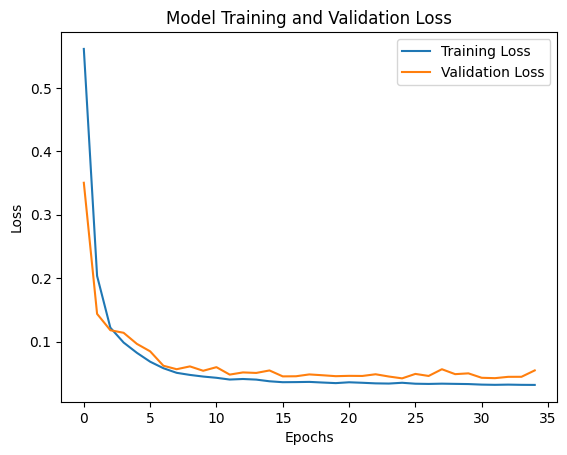

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

This plot helps us understand how the model's performance improved over time and whether it is overfitting or underfitting the training data.

Finally, we use the model to make predictions on the test set and visualize these predictions alongside the actual data:

7/7 [==============================] - 0s 4ms/step


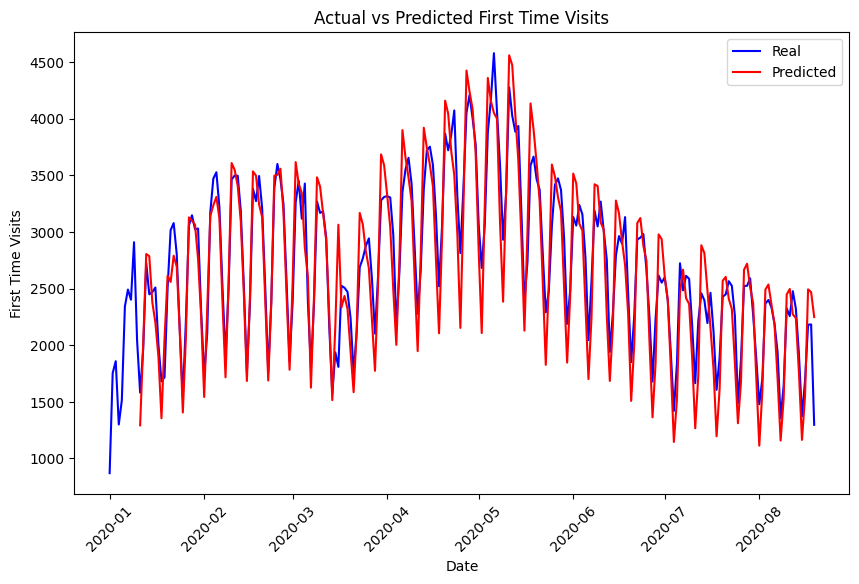

In [22]:
pred = model.predict(test_X)
plt.figure(figsize=(10, 6))
plt.plot(test_df["First.Time.Visits"], label="Real", color='blue')
plt.plot(pd.DataFrame(index=test_df.index[lookback:], data=scaler_output.inverse_transform(pred)), label="Predicted", color='red')
plt.xticks(rotation=45)
plt.title('Actual vs Predicted First Time Visits')
plt.xlabel('Date')
plt.ylabel('First Time Visits')
plt.legend()
plt.show()

The predicted values are scaled back to their original range using scaler_output.inverse_transform for a direct comparison with the actual data.
This visualization allows us to assess the model's predictive accuracy visually, comparing its forecasts against the true outcomes.

<ipython-input-14-fa7f67de0456>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 16)                1600      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1617 (6.32 KB)
Trainable params: 1617 (6.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
75/75 [==============================] - 3s 17ms/step - loss: 0.7268 - val_loss: 0.6116
Epoch 2/100
75/75 [==============================] - 1s 14ms/step - loss: 0.3384 - val_loss: 0.2891
Epoch 3/100
75/75 [==============================] - 1s 18ms/step - loss: 0.1890 - val_loss: 0.1978
Epoch 4/100
75/75 [==============================] - 2s 24ms/step - loss: 0.1458 - val_loss: 0.1892
Epoch 5/100
75/75 

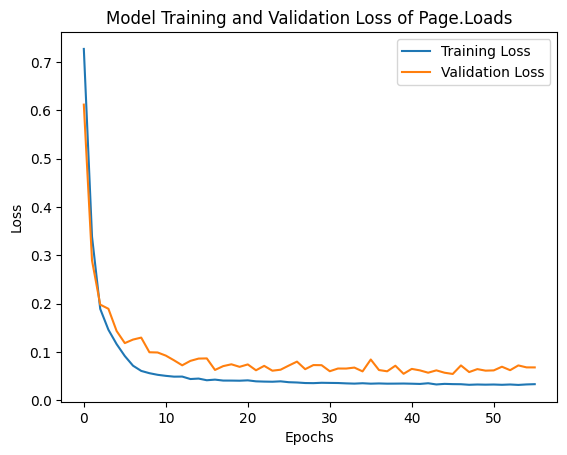

7/7 [==============================] - 0s 4ms/step


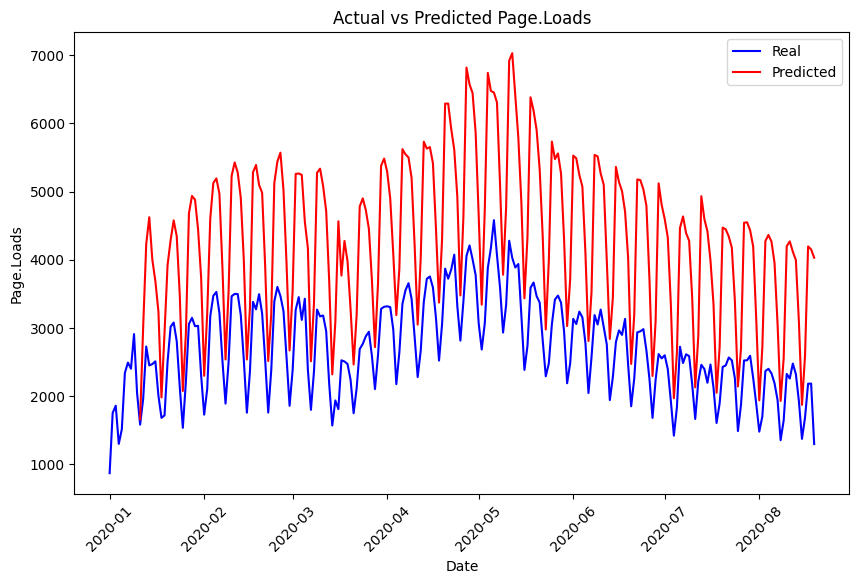

<ipython-input-14-fa7f67de0456>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 16)                1600      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1617 (6.32 KB)
Trainable params: 1617 (6.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
75/75 [==============================] - 3s 17ms/step - loss: 0.8579 - val_loss: 0.6072
Epoch 2/100
75/75 [==============================] - 1s 14ms/step - loss: 0.4479 - val_loss: 0.3427
Epoch 3/100
75/75 [==============================] - 1s 15ms/step - loss: 0.2378 - val_loss: 0.1868
Epoch 4/100
75/75 [==============================] - 1s 14ms/step - loss: 0.1612 - val_loss: 0.1450
Epoch 5/100
75/75 

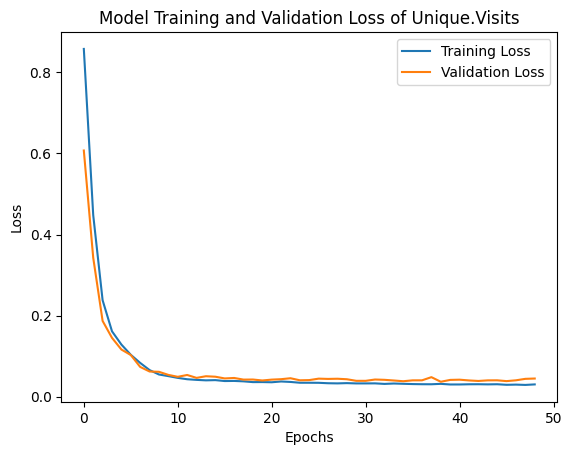

7/7 [==============================] - 0s 4ms/step


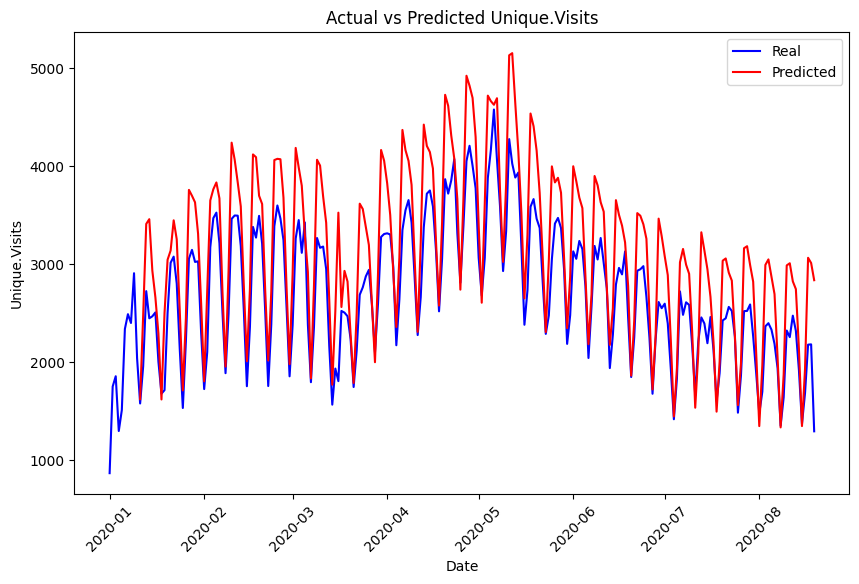

<ipython-input-14-fa7f67de0456>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 16)                1600      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1617 (6.32 KB)
Trainable params: 1617 (6.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
75/75 [==============================] - 3s 19ms/step - loss: 0.5409 - val_loss: 0.3420
Epoch 2/100
75/75 [==============================] - 1s 15ms/step - loss: 0.2486 - val_loss: 0.1800
Epoch 3/100
75/75 [==============================] - 2s 20ms/step - loss: 0.1504 - val_loss: 0.1305
Epoch 4/100
75/75 [==============================] - 2s 30ms/step - loss: 0.1127 - val_loss: 0.1016
Epoch 5/100
75/75 

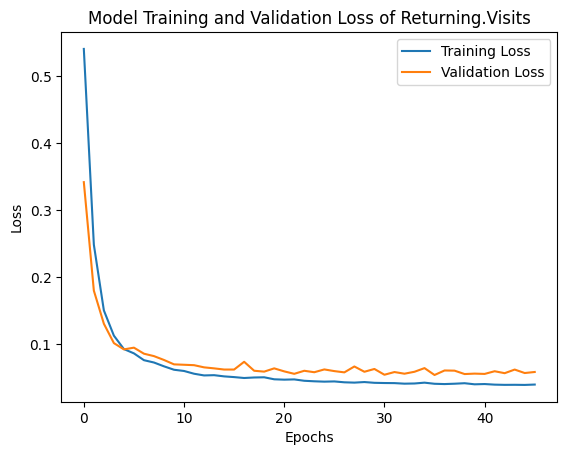

7/7 [==============================] - 0s 4ms/step


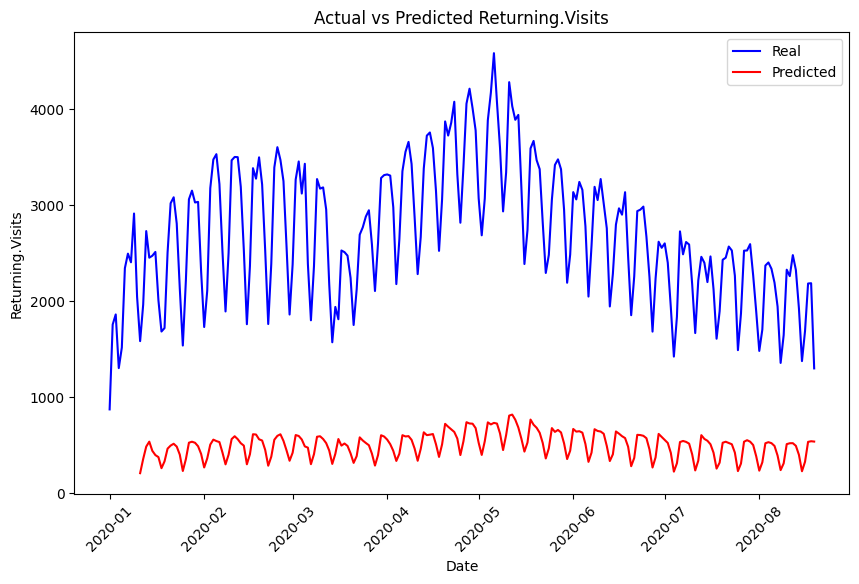

In [23]:
def train_and_evaluate_model(var, train_df, valid_df, test_df):
    scaler_input = StandardScaler()
    scaler_output = StandardScaler()

    # Scaling the Training and target Variables
    scaled_train = scaler_input.fit_transform(train_df)
    target_train = scaler_output.fit_transform(train_df[[var]])
    scaled_valid = scaler_input.transform(valid_df)
    target_valid = scaler_output.transform(valid_df[[var]])
    scaled_test = scaler_input.transform(test_df)
    target_test = scaler_output.transform(test_df[[var]])

    # Train and evaluate the model for the current variable
    lookback = 10
    train_X, train_y = process_Xy(scaled_train, target_train, lookback=lookback)
    valid_X, valid_y = process_Xy(scaled_valid, target_valid, lookback=lookback)
    test_X, test_y = process_Xy(scaled_test, target_test, lookback=lookback)

    # Setting up the LSTM model Sequential Architecture
    model = keras.Sequential([
        layers.LSTM(16, activation="relu", input_shape=train_X.shape[1:]),
        layers.Dense(1),
    ])

    # Setting up the model's parameters
    model.compile(loss='MeanSquaredError', optimizer='Adam')

    # Printing the summary of the model.
    model.summary()

    callbacks = [EarlyStopping(monitor="val_loss", patience=10)]

    # Training the model
    history = model.fit(train_X,
                        train_y,
                        validation_data=(valid_X, valid_y),
                        batch_size=16,
                        epochs=100,
                        callbacks=callbacks,
                        shuffle=True,
                        verbose=True)

    # Plotting the Training and the Validation loss of the model.
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Training and Validation Loss of {var}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Plotting the Real and the Predicted values for target_var
    pred = model.predict(test_X)
    plt.figure(figsize=(10, 6))
    plt.plot(test_df["First.Time.Visits"], label="Real", color='blue')
    plt.plot(pd.DataFrame(index=test_df.index[lookback:], data=scaler_output.inverse_transform(pred)), label="Predicted", color='red')
    plt.xticks(rotation=45)
    plt.title(f'Actual vs Predicted {var}')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.legend()
    plt.show()

# Call the function for each target variable
train_and_evaluate_model("Page.Loads", train_df, valid_df, test_df)
train_and_evaluate_model("Unique.Visits", train_df, valid_df, test_df)
train_and_evaluate_model("Returning.Visits", train_df, valid_df, test_df)


<ipython-input-14-fa7f67de0456>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 16)                1600      
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1617 (6.32 KB)
Trainable params: 1617 (6.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
75/75 [==============================] - 3s 17ms/step - loss: 0.6977 - val_loss: 0.4234
Epoch 2/100
75/75 [==============================] - 1s 15ms/step - loss: 0.2358 - val_loss: 0.1903
Epoch 3/100
75/75 [==============================] - 2s 22ms/step - loss: 0.1399 - val_loss: 0.1813
Epoch 4/100
75/75 [==============================] - 1s 19ms/step - loss: 0.1125 - val_loss: 0.1317
Epoch 5/100
75/75 

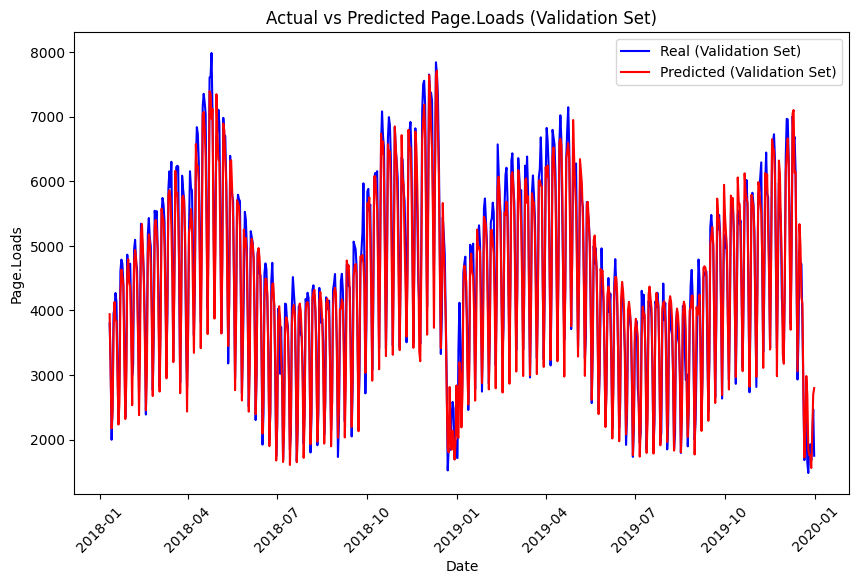

In [27]:
def train_and_evaluate_model(var, train_df, valid_df, test_df):
    scaler_input = StandardScaler()
    scaler_output = StandardScaler()

    # Scaling the Training and target Variables
    scaled_train = scaler_input.fit_transform(train_df)
    target_train = scaler_output.fit_transform(train_df[[var]])
    scaled_valid = scaler_input.transform(valid_df)
    target_valid = scaler_output.transform(valid_df[[var]])
    scaled_test = scaler_input.transform(test_df)
    target_test = scaler_output.transform(test_df[[var]])

    # Train and evaluate the model for the current variable
    lookback = 10
    train_X, train_y = process_Xy(scaled_train, target_train, lookback=lookback)
    valid_X, valid_y = process_Xy(scaled_valid, target_valid, lookback=lookback)
    test_X, test_y = process_Xy(scaled_test, target_test, lookback=lookback)

    # Setting up the LSTM model Sequential Architecture
    model = keras.Sequential([
        layers.LSTM(16, activation="relu", input_shape=train_X.shape[1:]),
        layers.Dense(1),
    ])

    # Setting up the model's parameters
    model.compile(loss='MeanSquaredError', optimizer='Adam')

    # Printing the summary of the model.
    model.summary()

    callbacks = [EarlyStopping(monitor="val_loss", patience=10)]

    # Training the model
    history = model.fit(train_X,
                        train_y,
                        validation_data=(valid_X, valid_y),
                        batch_size=16,
                        epochs=100,
                        callbacks=callbacks,
                        shuffle=True,
                        verbose=True)

    # Plotting the Real and the Predicted values for target_var for the validation set
    pred_valid = model.predict(valid_X)
    plt.figure(figsize=(10, 6))
    plt.plot(valid_df.index[lookback:], valid_df["Page.Loads"].values[lookback:], label="Real (Validation Set)", color='blue')
    plt.plot(valid_df.index[lookback:], scaler_output.inverse_transform(pred_valid), label="Predicted (Validation Set)", color='red')
    plt.xticks(rotation=45)
    plt.title(f'Actual vs Predicted {var} (Validation Set)')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.legend()
    plt.show()

# Call the function for "Page.Loads" variable
train_and_evaluate_model("Page.Loads", train_df, valid_df, test_df)


<ipython-input-14-fa7f67de0456>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 16)                1248      
                                                                 
 dense_16 (Dense)            (None, 32)                544       
                                                                 
 dense_17 (Dense)            (None, 16)                528       
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 8)                 136       
                                                                 
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 4)                

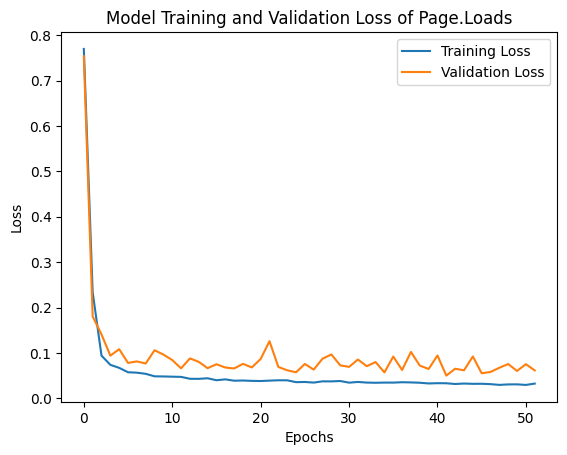

7/7 [==============================] - 0s 4ms/step


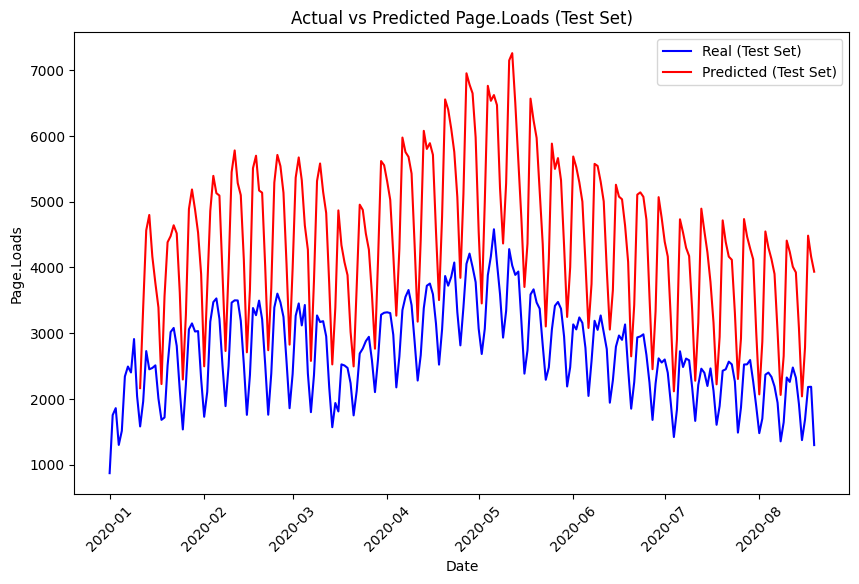

23/23 [==============================] - 0s 4ms/step


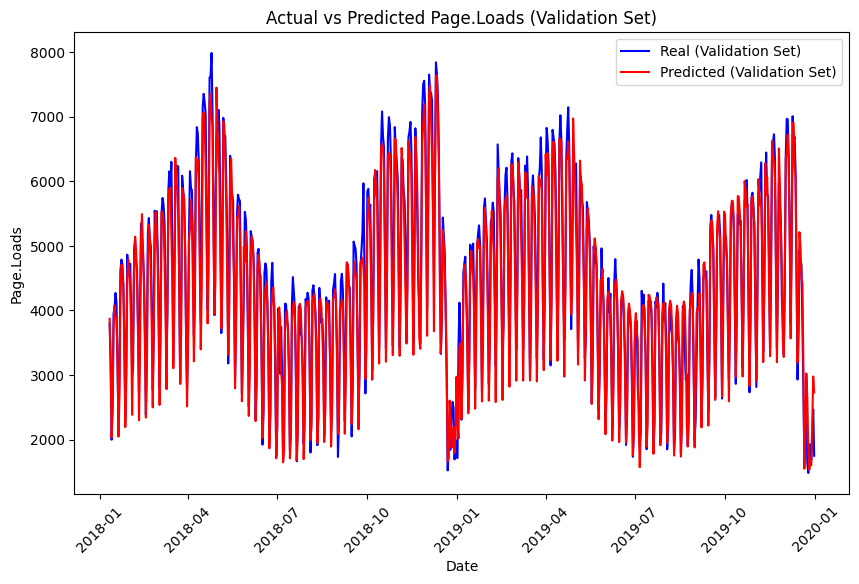

In [33]:
def train_and_evaluate_model(var, train_df, valid_df, test_df):
    scaler_input = StandardScaler()
    scaler_output = StandardScaler()

    # Scaling the Training and target Variables
    scaled_train = scaler_input.fit_transform(train_df)
    target_train = scaler_output.fit_transform(train_df[[var]])
    scaled_valid = scaler_input.transform(valid_df)
    target_valid = scaler_output.transform(valid_df[[var]])
    scaled_test = scaler_input.transform(test_df)
    target_test = scaler_output.transform(test_df[[var]])

    # Train and evaluate the model for the current variable
    lookback = 10
    train_X, train_y = process_Xy(scaled_train, target_train, lookback=lookback)
    valid_X, valid_y = process_Xy(scaled_valid, target_valid, lookback=lookback)
    test_X, test_y = process_Xy(scaled_test, target_test, lookback=lookback)

    # Setting up the GRU model Sequential Architecture with various dense layers
    model = keras.Sequential([
        layers.GRU(16, activation="relu", input_shape=train_X.shape[1:]),
        layers.Dense(32, activation="relu"),  # First Dense layer with 32 units and ReLU activation
        layers.Dense(16, activation="relu"),  # Second Dense layer with 16 units and ReLU activation
        layers.Dense(16, activation="relu"),  # Third Dense layer with 16 units and ReLU activation
        layers.Dense(8, activation="relu"),   # Fourth Dense layer with 8 units and ReLU activation
        layers.Dense(8, activation="relu"),   # Fifth Dense layer with 8 units and ReLU activation
        layers.Dense(4, activation="relu"),   # Sixth Dense layer with 4 units and ReLU activation
        layers.Dense(1),                      # Output layer with 1 unit
    ])

    # Setting up the model's parameters
    model.compile(loss='MeanSquaredError', optimizer='Adam')

    # Printing the summary of the model.
    model.summary()

    callbacks = [EarlyStopping(monitor="val_loss", patience=10)]

    # Training the model
    history = model.fit(train_X,
                        train_y,
                        validation_data=(valid_X, valid_y),
                        batch_size=16,
                        epochs=100,
                        callbacks=callbacks,
                        shuffle=True,
                        verbose=True)

    # Plotting the Training and the Validation loss of the model.
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Training and Validation Loss of {var}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Plotting the Real and the Predicted values for target_var for the test set
    pred_test = model.predict(test_X)
    plt.figure(figsize=(10, 6))
    plt.plot(test_df["First.Time.Visits"], label="Real (Test Set)", color='blue')
    plt.plot(pd.DataFrame(index=test_df.index[lookback:], data=scaler_output.inverse_transform(pred_test)), label="Predicted (Test Set)", color='red')
    plt.xticks(rotation=45)
    plt.title(f'Actual vs Predicted {var} (Test Set)')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.legend()
    plt.show()

    # Plotting the Real and the Predicted values for target_var for the validation set
    pred_valid = model.predict(valid_X)
    plt.figure(figsize=(10, 6))
    plt.plot(valid_df.index[lookback:], valid_df["Page.Loads"].values[lookback:], label="Real (Validation Set)", color='blue')
    plt.plot(valid_df.index[lookback:], scaler_output.inverse_transform(pred_valid), label="Predicted (Validation Set)", color='red')
    plt.xticks(rotation=45)
    plt.title(f'Actual vs Predicted {var} (Validation Set)')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.legend()
    plt.show()

# Call the function for "Page.Loads" variable
train_and_evaluate_model("Page.Loads", train_df, valid_df, test_df)


<ipython-input-37-b035153c31ad>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[target_index] = raw_y[i]


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 16)                1472      
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1489 (5.82 KB)
Trainable params: 1489 (5.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
68/68 [==============================] - 3s 18ms/step - loss: 0.3230 - val_loss: 0.1185
Epoch 2/100
68/68 [==============================] - 1s 22ms/step - loss: 0.0847 - val_loss: 0.0790
Epoch 3/100
68/68 [==============================] - 1s 20ms/step - loss: 0.0684 - val_loss: 0.0801
Epoch 4/100
68/68 [==============================] - 1s 13ms/step - loss: 0.0632 - val_loss: 0.0693
Epoch 5/100
68/68

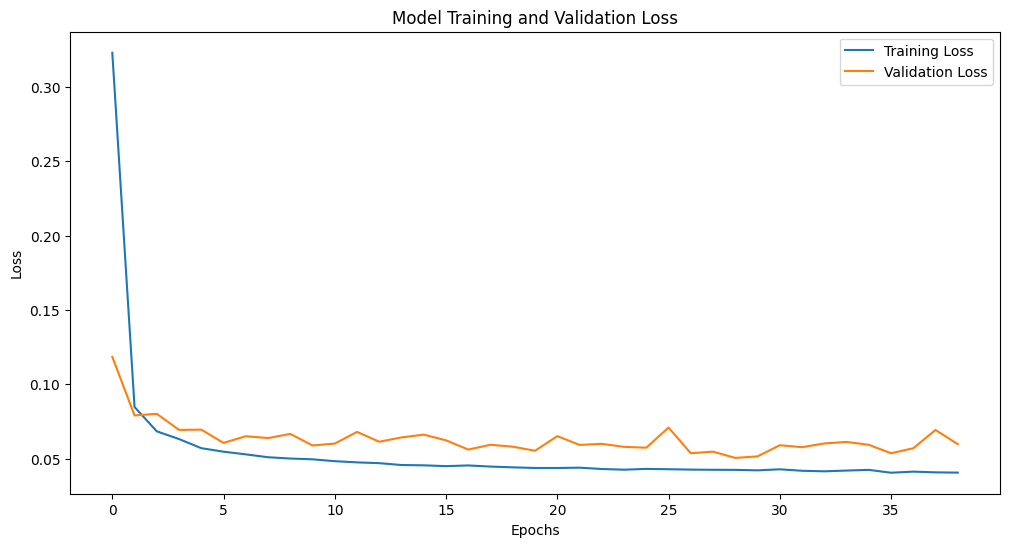

11/11 [==============================] - 0s 3ms/step


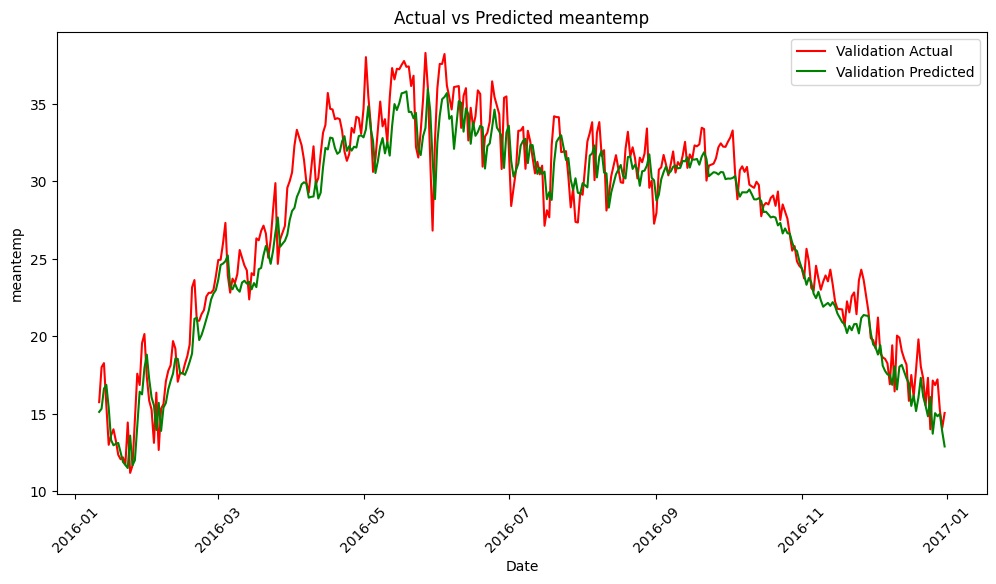

In [37]:
def forecast_mean_temp(dataset_path):
    # Load the dataset
    df = pd.read_csv(dataset_path)

    # Making date the index of the df
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True)

    # Preprocessing the outlier in meanpressure column
    Q1 = df['meanpressure'].quantile(0.25)
    Q3 = df['meanpressure'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['meanpressure'] >= (Q1 - 1.5 * IQR)) & (df['meanpressure'] <= (Q3 + 1.5 * IQR))]

    # cyclical features for "day-of-the-year"
    df["Day.Of.Year.X"], df["Day.Of.Year.Y"] = np.sin(2 * np.pi * df.index.day_of_year / 365), np.cos(2 * np.pi * df.index.day_of_year / 365)

    # Set the training, validation, and testing periods
    train_start = pd.Timestamp("2013")
    valid_start = pd.Timestamp("2016")
    test_start = pd.Timestamp("2017")
    train_df = df[(df.index >= train_start) & (df.index < valid_start)].copy()
    valid_df = df[(df.index >= valid_start) & (df.index < test_start)].copy()
    test_df = df[(df.index >= test_start)].copy()

    # Scaling the values
    scaler_input = StandardScaler()
    scaler_output = StandardScaler()

    scaled_train = scaler_input.fit_transform(train_df)
    target_train = scaler_output.fit_transform(train_df[["meantemp"]])
    scaled_valid = scaler_input.transform(valid_df)
    target_valid = scaler_output.transform(valid_df[["meantemp"]])
    scaled_test = scaler_input.transform(test_df)
    target_test = scaler_output.transform(test_df[["meantemp"]])

    # Framing the dataset into sequences of a specific length
    def process_Xy(raw_X, raw_y, lookback):
        X = np.empty(shape=(raw_X.shape[0] - lookback, lookback, raw_X.shape[1]), dtype=np.float32)
        y = np.empty(shape=(raw_y.shape[0] - lookback), dtype=np.float32)

        target_index = 0
        for i in range(lookback, raw_X.shape[0]):
            X[target_index] = raw_X[i - lookback: i]
            y[target_index] = raw_y[i]
            target_index += 1

        return X.copy(), y.copy()

    # Set the lookback period
    lookback = 10
    train_X, train_y = process_Xy(scaled_train, target_train, lookback=lookback)
    valid_X, valid_y = process_Xy(scaled_valid, target_valid, lookback=lookback)
    test_X, test_y = process_Xy(scaled_test, target_test, lookback=lookback)

    # Setting up the LSTM model Sequential Architecture
    model = keras.Sequential([
        layers.LSTM(16, activation="relu", input_shape=train_X.shape[1:]),
        layers.Dense(1),
    ])

    # Setting up the model's parameters
    model.compile(loss='MeanSquaredError', optimizer='Adam')

    # Printing the summary of the model.
    model.summary()

    callbacks = [EarlyStopping(monitor="val_loss", patience=10)]

    # Training the model
    history = model.fit(train_X,
                        train_y,
                        validation_data=(valid_X, valid_y),
                        batch_size=16,
                        epochs=100,
                        callbacks=callbacks,
                        shuffle=True,
                        verbose=True)

    # Plot results (including validation data)
    plt.figure(figsize=(12, 6))

    # Plot training and validation loss
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Get predictions for validation set
    val_pred = model.predict(valid_X)

    # Inverse transform predictions and validation data for plotting
    val_y_inverse = scaler_output.inverse_transform(valid_y.reshape(-1, 1))  # Reshape for plotting
    val_pred_inverse = scaler_output.inverse_transform(val_pred)

    # Plot actual vs predicted for validation set only
    plt.figure(figsize=(12, 6))
    plt.plot(valid_df.index[lookback:], val_y_inverse, label="Validation Actual", color='red')
    plt.plot(valid_df.index[lookback:], val_pred_inverse, label="Validation Predicted", color='green')

    plt.xticks(rotation=45)
    plt.title('Actual vs Predicted meantemp')
    plt.xlabel('Date')
    plt.ylabel("meantemp")
    plt.legend()
    plt.show()

    return model, history

# Call the function with the dataset path
model, history = forecast_mean_temp("DailyDelhiClimate.csv")


**Conclusion**

In deciding whether to include 'day-of-the-week' analysis in forecasting models, two main considerations come into play. Firstly, if the dataset's seasonal patterns are predominantly influenced by the time of year rather than specific days of the week, leveraging cyclical features like 'day-of-the-year' can effectively capture these variations. Consequently, the added complexity of incorporating 'day-of-the-week' features may not substantially enhance forecasting accuracy in such cases. Additionally, if the dataset already accounts for weekly variations through its date column, including 'day-of-the-week' features could potentially introduce redundancy and unnecessarily increase model complexity without commensurate improvements in performance.